In [66]:
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import joblib

In [4]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.sample()

,Category,Message
210,ham,Both :) i shoot big loads so get ready!


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.index

RangeIndex(start=0, stop=5572, step=1)

In [8]:
data.shape

(5572, 2)

In [10]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [13]:
data[data.duplicated()].Category.value_counts()

Category
ham     309
spam    106
Name: count, dtype: int64

In [14]:
data.Category.value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [17]:
data["Category"] = data.Category.map(lambda x: 1 if x == 'spam' else 0)

In [25]:
x_train,x_test,y_train,y_test = train_test_split(data.Message,data.Category,test_size=0.2)

In [26]:
x_train.shape

(4457,)

In [27]:
x_test.shape

(1115,)

In [28]:
x_train[:4]

4992    We made it! Eta at taunton is 12:30 as planned...
1286             Just wondering, the others just took off
2831                              Howz that persons story
1561    Just got some gas money, any chance you and th...
Name: Message, dtype: object

In [30]:
x_train.values

array(['We made it! Eta at taunton is 12:30 as planned, hope that‘s still okday?! Good to see you! :-xx',
       'Just wondering, the others just took off',
       'Howz that persons story', ...,
       'Today is ACCEPT DAY..U Accept me as? Brother Sister Lover Dear1 Best1 Clos1 Lvblefrnd Jstfrnd Cutefrnd Lifpartnr Belovd Swtheart Bstfrnd No rply means enemy',
       "Usually the person is unconscious that's in children but in adults they may just behave abnormally. I.ll call you now",
       'Sorry chikku, my cell got some problem thts y i was nt able to reply u or msg u..'],
      dtype=object)

In [31]:
v = CountVectorizer()
x_train_cv = v.fit_transform(x_train.values)

In [34]:
x_train_np = x_train_cv.toarray()

In [35]:
x_train_cv.shape

(4457, 7763)

In [36]:
v.get_feature_names_out()[1771]

'childish'

In [38]:
v.vocabulary_

{'we': 7425,
 'made': 4295,
 'it': 3746,
 'eta': 2630,
 'at': 1105,
 'taunton': 6714,
 'is': 3735,
 '12': 266,
 '30': 421,
 'as': 1075,
 'planned': 5217,
 'hope': 3475,
 'that': 6808,
 'still': 6473,
 'okday': 4902,
 'good': 3171,
 'to': 6935,
 'see': 5976,
 'you': 7724,
 'xx': 7672,
 'just': 3861,
 'wondering': 7595,
 'the': 6812,
 'others': 4985,
 'took': 6976,
 'off': 4879,
 'howz': 3510,
 'persons': 5146,
 'story': 6500,
 'got': 3186,
 'some': 6279,
 'gas': 3070,
 'money': 4561,
 'any': 985,
 'chance': 1709,
 'and': 951,
 'gang': 3060,
 'want': 7388,
 'go': 3147,
 'on': 4916,
 'grand': 3208,
 'nature': 4693,
 'adventure': 818,
 'sorry': 6315,
 'll': 4149,
 'call': 1591,
 'later': 4017,
 'me': 4402,
 'when': 7492,
 'finish': 2839,
 'then': 6824,
 'come': 1890,
 'pick': 5182,
 'yup': 7748,
 'thk': 6853,
 'they': 6837,
 'teacher': 6729,
 'said': 5872,
 'will': 7532,
 'make': 4319,
 'my': 4652,
 'face': 2723,
 'look': 4186,
 'longer': 4184,
 'darren': 2148,
 'ask': 1085,
 'not': 4815,


In [39]:
np.where(x_train_np[0]!=0)

(array([ 266,  421, 1075, 1105, 2630, 3171, 3475, 3735, 3746, 4295, 4902,
        5217, 5976, 6473, 6714, 6808, 6935, 7425, 7672, 7724], dtype=int64),)

In [40]:
model = MultinomialNB()
model.fit(x_train_cv,y_train)

MultinomialNB()

In [41]:
x_test_cv = v.transform(x_test)
pred = model.predict(x_test_cv)

In [42]:
model.score(x_train_cv,y_train)

0.9930446488669509

In [57]:
np.concatenate((y_test.values.reshape(-1,1),np.array(pred).reshape(-1,1)),axis=1)[:50]

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int64)

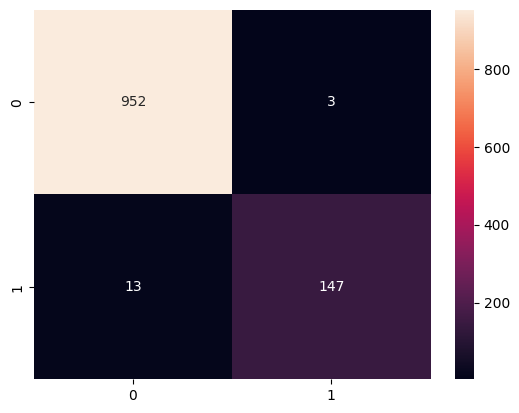

In [58]:
cm = confusion_matrix(y_test.values,pred)
sns.heatmap(cm,annot=True,fmt='.3g')
plt.show()

In [60]:
print(classification_report(y_test.values,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.92      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [61]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
model.predict(emails_count)

array([0, 1], dtype=int64)

In [64]:
pipe = Pipeline(steps=[
("Vectorizer",CountVectorizer()),
("NaiveBayes",MultinomialNB())])
pipe.fit(x_train,y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('NaiveBayes', MultinomialNB())])

In [65]:
y_pred = pipe.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.92      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [67]:
joblib.dump(pipe,"NB_CLF.h5")

['NB_CLF.h5']